In [1]:
# --- Regression vs Classification Demo ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# 1. Simulate a simple 1-D relationship
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_cont = 3 * X.squeeze() + np.random.normal(0, 2, 100)        # continuous target
y_class = (y_cont > 15).astype(int)                           # binary target (threshold)

In [3]:
# 2. Fit models
reg = LinearRegression().fit(X, y_cont)
clf = LogisticRegression().fit(X, y_class)

In [4]:
# 3. Predictions
x_test = np.linspace(0, 10, 200).reshape(-1, 1)
y_pred_reg = reg.predict(x_test)
y_pred_clf_prob = clf.predict_proba(x_test)[:, 1]

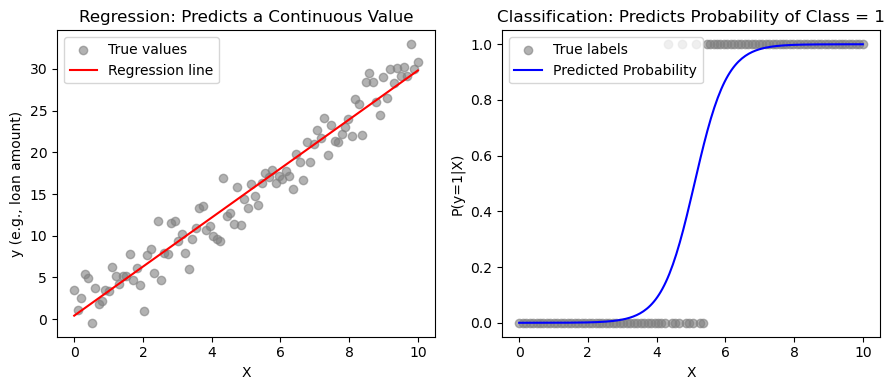

In [5]:
# 4. Plot
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.scatter(X, y_cont, color='gray', alpha=0.6, label='True values')
plt.plot(x_test, y_pred_reg, color='red', label='Regression line')
plt.title("Regression: Predicts a Continuous Value")
plt.xlabel("X"); plt.ylabel("y (e.g., loan amount)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, y_class, color='gray', alpha=0.6, label='True labels')
plt.plot(x_test, y_pred_clf_prob, color='blue', label='Predicted Probability')
plt.title("Classification: Predicts Probability of Class = 1")
plt.xlabel("X"); plt.ylabel("P(y=1|X)")
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
print("Linear Regression Coefficients:")
print(f"Intercept: {reg.intercept_:.3f}, Coef: {reg.coef_[0]:.3f}")

print("\nLogistic Regression Coefficients:")
print(f"Intercept: {clf.intercept_[0]:.3f}, Coef: {clf.coef_[0][0]:.3f}")

Linear Regression Coefficients:
Intercept: 0.417, Coef: 2.941

Logistic Regression Coefficients:
Intercept: -10.798, Coef: 2.117


In [16]:
# --- Evaluate and visualize loss functions for Regression vs Classification ---

from sklearn.metrics import mean_squared_error, log_loss

# 1. Regression loss (Mean Squared Error)
mse = mean_squared_error(y_cont, reg.predict(X))
print(f"Regression Loss (MSE): {mse:.3f}")

# 2. Classification loss (Logistic / Cross-Entropy Loss)
y_prob = clf.predict_proba(X)[:, 1]
logloss = log_loss(y_class, y_prob)
print(f"Classification Loss (Logistic Loss): {logloss:.3f}")

Regression Loss (MSE): 4.033
Classification Loss (Logistic Loss): 0.109


In [3]:
import statsmodels.api as sm

# Linear regression with t-values
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y_cont, X_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1786.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.01e-64
Time:                        09:08:58   Log-Likelihood:                -211.62
No. Observations:                 100   AIC:                             427.2
Df Residuals:                      98   BIC:                             432.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4169      0.403      1.035      0.3

In [7]:


# Logistic regression with t-values
logit_model = sm.Logit(y_class, X_sm).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.099208
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.8568
Time:                        09:09:31   Log-Likelihood:                -9.9208
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 1.189e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7465      5.348     -3.131      0.002     -27.228      -6.265
x1             3.2830      1

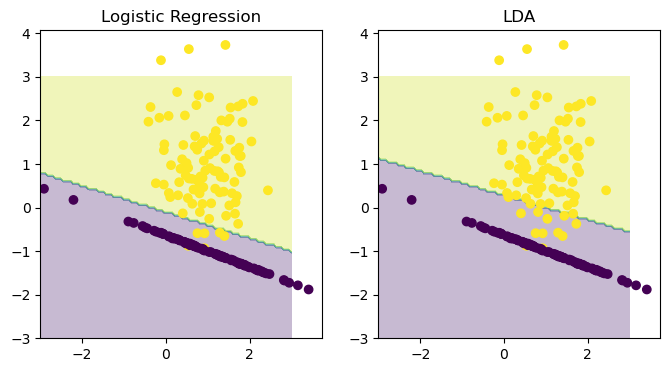

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           n_samples=200, random_state=2)

logit = LogisticRegression().fit(X, y)
lda = LinearDiscriminantAnalysis().fit(X, y)

# plot decision boundaries
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z1 = logit.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].contourf(xx, yy, Z1, alpha=0.3)
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_title("Logistic Regression")

ax[1].contourf(xx, yy, Z2, alpha=0.3)
ax[1].scatter(X[:,0], X[:,1], c=y)
ax[1].set_title("LDA")
plt.show()
